In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#set directory
os.getcwd()
os.chdir("/Users/varun/MEGA/Python/Data")

#list of desired DDI Types
desired_DDI = [0, 1, 2, 3, 4, 5, 6, 7, 15, 16, 17, 18, 19, 20, 21, 22, 26, 28, 30, 31, 32, 38, 40, 41, 43, 44, 45,
               49, 50, 51, 52, 54, 55, 62, 67, 68, 72, 74, 76, 78, 79, 80, 81]

ddidata = pd.read_excel("DrugBank_known_ddi.xlsx")
interactiondict = pd.read_csv("interaction_information.csv")
safe_drugs = pd.read_csv("safe_drug_combos.csv")
drug_similarity_feature = pd.read_csv("drug_similarity.csv")
drug_similarity = drug_similarity_feature.iloc[:, 1:len(drug_similarity_feature)+1]
#filter ddidata for desired DDI types
up_ddidata = ddidata[ddidata.Label.isin(desired_DDI)]
new_ddidata = up_ddidata.copy()
#convert types to int
new_ddidata.drug1 = up_ddidata.drug1.str[2:].astype(int)
new_ddidata.drug2 = up_ddidata.drug2.str[2:].astype(int)
new_ddidata.Label = up_ddidata.Label


In [81]:
#Incorporate safe_drugs into new_ddidata with DDIType 0
safe_drugs["Label"] = 0

frames = [safe_drugs, new_ddidata]
ddi_df = pd.concat(frames)
len(ddi_df)

103988

In [82]:
count = {}
#initialize dict
for i in range(0, 82):
    count[i] = 0
    
#count number of examples for each DDItype
for i in range(0, 82):
    if i in desired_DDI:
        count[i] = len(ddi_df[ddi_df.Label == (i)])
    
    


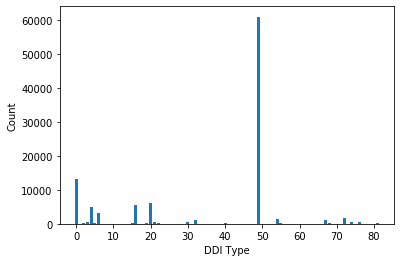

In [28]:
#plot count
plt.bar(range(len(count)), list(count.values()))
plt.xlabel("DDI Type")
plt.ylabel("Count")
plt.show()

In [ ]:
#simple neural network for ddi prediction

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.models.Sequential([
  layers.Dense(43, activation = "sigmoid"),
 
])

In [79]:
drug_similarity_feature.head()

,Unnamed: 0,DB00006,DB00014,DB00027,DB00035,DB00050,DB00080,DB00091,DB00093,DB00104,...,DB13874,DB13878,DB13879,DB13882,DB13908,DB13909,DB13910,DB13911,DB13925,DB13928
0,DB00006,1.000000,0.630568,0.694057,0.502846,0.691275,0.600644,0.479255,0.489524,0.436847,...,0.154394,0.387755,0.311340,0.068602,0.164557,0.073107,0.307863,0.069221,0.522109,0.588346
1,DB00014,0.630568,1.000000,0.604824,0.642393,0.793826,0.637409,0.473214,0.624837,0.596354,...,0.254937,0.476671,0.408759,0.122622,0.253465,0.108108,0.420712,0.114504,0.632997,0.381986
2,DB00027,0.694057,0.604824,1.000000,0.407295,0.679111,0.558298,0.547576,0.423194,0.456389,...,0.170323,0.326409,0.241417,0.075253,0.163209,0.057225,0.325359,0.080863,0.481515,0.570597
3,DB00035,0.502846,0.642393,0.407295,1.000000,0.583333,0.591224,0.449689,0.931751,0.723781,...,0.270386,0.521368,0.491582,0.136126,0.294686,0.117949,0.345351,0.129330,0.697500,0.255708
4,DB00050,0.691275,0.793826,0.679111,0.583333,1.000000,0.607570,0.445387,0.559113,0.554601,...,0.231788,0.426190,0.341530,0.126923,0.231884,0.094697,0.403008,0.115587,0.594883,0.447619


In [31]:
ddi_df.head()

,drug1,drug2,Label
0,956,316,0
1,977,717,0
2,977,957,0
3,1060,766,0
4,1395,977,0


In [78]:
drug_similarity.columns = drug_similarity_feature.columns[1:len(drug_similarity_feature)+1].str[2:6].astype(int)

TypeError: Index does not support mutable operations

In [76]:
drug_similarity.shape

(2159, 2159)

In [67]:
drug_similarity_feature.shape

(2159, 2160)

In [48]:
drug_similarity.iloc[0,0]

1.0

In [77]:
drug_similarity.head()

,0,1,2,3,5,8,9,9,10,10,...,1387,1387,1387,1388,1390,1390,1391,1391,1392,1392
0,1.000000,0.630568,0.694057,0.502846,0.691275,0.600644,0.479255,0.489524,0.436847,0.684519,...,0.154394,0.387755,0.311340,0.068602,0.164557,0.073107,0.307863,0.069221,0.522109,0.588346
1,0.630568,1.000000,0.604824,0.642393,0.793826,0.637409,0.473214,0.624837,0.596354,0.778022,...,0.254937,0.476671,0.408759,0.122622,0.253465,0.108108,0.420712,0.114504,0.632997,0.381986
2,0.694057,0.604824,1.000000,0.407295,0.679111,0.558298,0.547576,0.423194,0.456389,0.686170,...,0.170323,0.326409,0.241417,0.075253,0.163209,0.057225,0.325359,0.080863,0.481515,0.570597
3,0.502846,0.642393,0.407295,1.000000,0.583333,0.591224,0.449689,0.931751,0.723781,0.564103,...,0.270386,0.521368,0.491582,0.136126,0.294686,0.117949,0.345351,0.129330,0.697500,0.255708
4,0.691275,0.793826,0.679111,0.583333,1.000000,0.607570,0.445387,0.559113,0.554601,0.927900,...,0.231788,0.426190,0.341530,0.126923,0.231884,0.094697,0.403008,0.115587,0.594883,0.447619
